In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

main_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin" # 마지막 회차를 얻기 위한 주소
basic_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo=" # 임의의 회차를 얻기 위한 주소

# 마지막 회차 정보를 가져옴
def GetLast(): 
    resp = requests.get(main_url)
    soup = BeautifulSoup(resp.text, "lxml")
    result = str(soup.find("meta", {"id" : "desc", "name" : "description"})['content'])
    s_idx = result.find(" ")
    e_idx = result.find("회")
    return int(result[s_idx + 1 : e_idx])

# 지정된 파일에 지정된 범위의 회차 정보를 기록함
def Crawler(s_count, e_count, fp):
    for i in range(s_count , e_count + 1):
        crawler_url = basic_url + str(i)
        resp = requests.get(crawler_url)
        soup = BeautifulSoup(resp.text, "html.parser")

        text = soup.text

        s_idx = text.find(" 당첨결과")
        s_idx = text.find("당첨번호", s_idx) + 4
        e_idx = text.find("보너스", s_idx)
        numbers = text[s_idx:e_idx].strip().split()

        s_idx = e_idx + 3
        e_idx = s_idx + 3
        bonus = text[s_idx:e_idx].strip()

        s_idx = text.find("1등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money1 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("2등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money2 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("3등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money3 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("4등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money4 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("5등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money5 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        line = str(i) + ',' + numbers[0] + ',' + numbers[1] + ',' + numbers[2] + ',' + numbers[3] + ',' + numbers[4] + ',' + numbers[5] + ',' + bonus + ',' + money1 + ',' + money2 + ',' + money3 + ',' + money4 + ',' + money5
        print(line)
        line += '\n'
        fp.write(line)

last = GetLast() # 마지막 회차를 가져옴

fp = open('2020-1-25-keras_lstm_lotto_v895_data.csv', 'w')
Crawler(1, last, fp) # 처음부터 마지막 회차까지 저장
fp.close()

1,10,23,29,33,37,40,16,0,143934100,5140500,113400,10000
2,9,13,21,25,32,42,2,2002006800,94866800,1842000,100800,10000
3,11,16,19,21,27,31,30,2000000000,0,1174100,54900,10000
4,14,27,30,31,40,42,2,0,211191200,7282400,152100,10000
5,16,24,29,40,41,42,3,0,0,6033800,166500,10000
6,14,15,26,27,40,42,34,6574451700,196297600,4267300,87600,10000
7,2,9,16,25,26,40,42,0,48165000,1605500,65500,10000
8,8,19,25,34,37,39,9,0,131555000,2268100,110500,10000
9,2,4,16,17,36,39,14,0,769456500,8743800,260000,10000
10,9,25,30,33,41,44,6,6430437900,40813400,856400,27300,10000
11,1,7,36,37,41,42,14,4780152300,362132700,9307100,206800,10000
12,2,11,21,25,39,45,44,1348845700,99914400,1417500,70200,10000
13,22,23,25,37,38,42,26,0,433309300,5777400,175600,10000
14,2,6,12,31,33,40,15,9375048300,130363400,2568700,93900,10000
15,3,4,16,30,31,37,13,17014245000,177231700,5571100,144600,10000
16,6,7,24,37,38,40,33,4377146100,243174700,3385200,123500,10000
17,3,4,9,17,32,37,1,5349491200,297193900,2342100,86700,10000
18

In [13]:
import numpy as np

# 당첨번호를 원핫인코딩벡터(ohbin)으로 변환
def numbers2ohbin(numbers):

    ohbin = np.zeros(45) #45개의 빈 칸을 만듬

    for i in range(6): #여섯개의 당첨번호에 대해서 반복함
        ohbin[int(numbers[i])-1] = 1 #로또번호가 1부터 시작하지만 벡터의 인덱스 시작은 0부터 시작하므로 1을 뺌
    
    return ohbin

# 원핫인코딩벡터(ohbin)를 번호로 변환
def ohbin2numbers(ohbin):

    numbers = []
    
    for i in range(len(ohbin)):
        if ohbin[i] == 1.0: # 1.0으로 설정되어 있으면 해당 번호를 반환값에 추가한다.
            numbers.append(i+1)
    
    return numbers

In [14]:
print("1:" + str(numbers2ohbin([10,23,29,33,37,40])))
print("2:" + str(numbers2ohbin([9,13,21,25,32,42])))

1:[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
2:[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
rows = np.loadtxt("./2022-6-22-keras_lstm_lotto_v1020_data.csv", delimiter=",")
row_count = len(rows)

print("row count: " + str(row_count))

row count: 1020


In [16]:
numbers = rows[:, 1:7]
ohbins = list(map(numbers2ohbin, numbers))

x_samples = ohbins[0:row_count-1]
y_samples = ohbins[1:row_count]

#원핫인코딩으로 표시
print("ohbins")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

#번호로 표시
print("numbers")
print("X[0]: " + str(ohbin2numbers(x_samples[0])))
print("Y[0]: " + str(ohbin2numbers(y_samples[0])))

ohbins
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
numbers
X[0]: [10, 23, 29, 33, 37, 40]
Y[0]: [9, 13, 21, 25, 32, 42]


In [18]:
train_idx = (0, 777)
val_idx = (777, 1000)
test_idx = (1000, len(x_samples))

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx))

train: (0, 777), val: (777, 1000), test: (1000, 1019)


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# 모델을 정의합니다.
model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 매 에포크마다 훈련과 검증의 손실 및 정확도를 기록하기 위한 변수
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

    model.save('model_{0:04d}.h5'.format(epoch+1))

epoch    0 train acc 0.026 loss 0.410 val acc 0.013 loss 0.396
epoch    1 train acc 0.031 loss 0.396 val acc 0.018 loss 0.396
epoch    2 train acc 0.027 loss 0.394 val acc 0.013 loss 0.396
epoch    3 train acc 0.026 loss 0.392 val acc 0.022 loss 0.396
epoch    4 train acc 0.030 loss 0.389 val acc 0.027 loss 0.397
epoch    5 train acc 0.033 loss 0.385 val acc 0.036 loss 0.401
epoch    6 train acc 0.040 loss 0.379 val acc 0.049 loss 0.405
epoch    7 train acc 0.048 loss 0.373 val acc 0.031 loss 0.409
epoch    8 train acc 0.054 loss 0.367 val acc 0.036 loss 0.412
epoch    9 train acc 0.057 loss 0.361 val acc 0.027 loss 0.416
epoch   10 train acc 0.057 loss 0.354 val acc 0.031 loss 0.419
epoch   11 train acc 0.057 loss 0.347 val acc 0.031 loss 0.423
epoch   12 train acc 0.060 loss 0.340 val acc 0.031 loss 0.428
epoch   13 train acc 0.071 loss 0.332 val acc 0.018 loss 0.432
epoch   14 train acc 0.076 loss 0.323 val acc 0.018 loss 0.437
epoch   15 train acc 0.090 loss 0.313 val acc 0.018 los

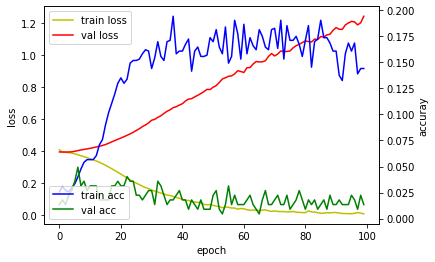

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [23]:
mean_prize = [  np.mean(rows[87:, 8]),
                np.mean(rows[87:, 9]),
                np.mean(rows[87:, 10]),
                np.mean(rows[87:, 11]),
                np.mean(rows[87:, 12])]

print(mean_prize)      

[2445398591.7052517, 57189971.76527331, 1450433.9796355842, 52648.42229367631, 5000.0]


In [24]:
# 등수와 상금을 반환함
# 순위에 오르지 못한 경우에는 등수가 0으로 반환함
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return 0, mean_prize[0]
    elif count == 5 and true_bonus in pred_numbers:
        return 1, mean_prize[1]
    elif count == 5:
        return 2, mean_prize[2]
    elif count == 4:
        return 3, mean_prize[3]
    elif count == 3:
        return 4, mean_prize[4]

    return 5, 0

In [25]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [26]:
train_total_reward = []
train_total_grade = np.zeros(6, dtype=int)

val_total_reward = []
val_total_grade = np.zeros(6, dtype=int)

test_total_reward = []
test_total_grade = np.zeros(6, dtype=int)

model.reset_states()

print('[No. ] 1st 2nd 3rd 4th 5th 6th Rewards')

for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs) # 모델의 출력값을 얻음
    
    sum_reward = 0
    sum_grade = np.zeros(6, dtype=int) # 6등까지 변수

    for n in range(10): # 10판 수행
        numbers = gen_numbers_from_probability(ys_pred[0])
        
        #i회차 입력 후 나온 출력을 i+1회차와 비교함
        grade, reward = calc_reward(rows[i+1,1:7], rows[i+1,7], numbers) 

        sum_reward += reward
        sum_grade[grade] += 1

        if i >= train_idx[0] and i < train_idx[1]:
            train_total_grade[grade] += 1
        elif i >= val_idx[0] and i < val_idx[1]:
            val_total_grade[grade] += 1
        elif i >= test_idx[0] and i < test_idx[1]:
            val_total_grade[grade] += 1
    
    if i >= train_idx[0] and i < train_idx[1]:
        train_total_reward.append(sum_reward)
    elif i >= val_idx[0] and i < val_idx[1]:
        val_total_reward.append(sum_reward)
    elif i >= test_idx[0] and i < test_idx[1]:
        test_total_reward.append(sum_reward)
                        
    print('[{0:4d}] {1:3d} {2:3d} {3:3d} {4:3d} {5:3d} {6:3d} {7:15,d}'.format(i+1, sum_grade[0], sum_grade[1], sum_grade[2], sum_grade[3], sum_grade[4], sum_grade[5], int(sum_reward)))

print('Total') 
print('==========')    
print('Train {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(train_total_grade[0], train_total_grade[1], train_total_grade[2], train_total_grade[3], train_total_grade[4], train_total_grade[5], int(sum(train_total_reward))))
print('Val   {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(val_total_grade[0], val_total_grade[1], val_total_grade[2], val_total_grade[3], val_total_grade[4], val_total_grade[5], int(sum(val_total_reward))))
print('Test  {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(test_total_grade[0], test_total_grade[1], test_total_grade[2], test_total_grade[3], test_total_grade[4], test_total_grade[5], int(sum(test_total_reward))))
print('==========')    

[No. ] 1st 2nd 3rd 4th 5th 6th Rewards
[   1]   3   0   4   3   0   0   7,342,155,456
[   2]   4   0   5   1   0   0   9,788,899,185
[   3]   3   0   6   0   1   0   7,344,903,378
[   4]   3   0   7   0   0   0   7,346,348,812
[   5]   3   0   4   3   0   0   7,342,155,456
[   6]   5   0   5   0   0   0  12,234,245,128
[   7]   2   0   7   1   0   0   4,901,002,869
[   8]   3   0   3   4   0   0   7,340,757,670
[   9]   2   0   7   1   0   0   4,901,002,869
[  10]   5   0   3   2   0   0  12,231,449,557
[  11]   5   0   3   2   0   0  12,231,449,557
[  12]   5   0   3   2   0   0  12,231,449,557
[  13]   3   0   6   1   0   0   7,344,951,027
[  14]   4   0   6   0   0   0   9,790,296,970
[  15]   4   0   3   3   0   0   9,786,103,614
[  16]   2   1   3   4   0   0   4,952,549,050
[  17]   3   0   6   1   0   0   7,344,951,027
[  18]   3   0   4   3   0   0   7,342,155,456
[  19]   2   0   7   1   0   0   4,901,002,869
[  20]   3   1   4   2   0   0   7,399,292,779
[  21]   3   0   4   

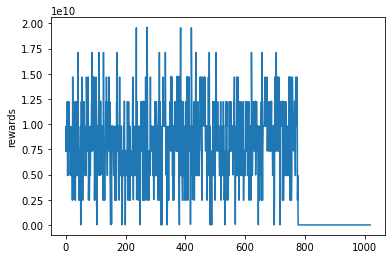

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

total_reward = train_total_reward + val_total_reward + test_total_reward

plt.plot(total_reward)
plt.ylabel('rewards')
plt.show()

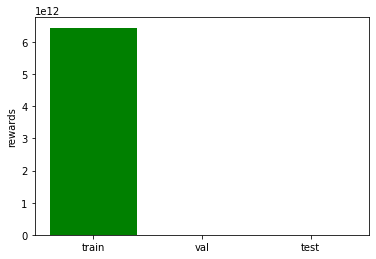

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

rewards = [sum(train_total_reward), sum(val_total_reward), sum(test_total_reward)]

class_color=['green', 'blue', 'red']

plt.bar(['train', 'val', 'test'], rewards, color=class_color)
plt.ylabel('rewards')
plt.show()

In [29]:
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    for i in range(len(x_samples)):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))  

epoch    0 train acc 0.135 loss 0.149
epoch    1 train acc 0.131 loss 0.201
epoch    2 train acc 0.132 loss 0.201
epoch    3 train acc 0.134 loss 0.193
epoch    4 train acc 0.136 loss 0.183
epoch    5 train acc 0.141 loss 0.174
epoch    6 train acc 0.142 loss 0.166
epoch    7 train acc 0.145 loss 0.158
epoch    8 train acc 0.147 loss 0.151
epoch    9 train acc 0.149 loss 0.146
epoch   10 train acc 0.153 loss 0.140
epoch   11 train acc 0.154 loss 0.136
epoch   12 train acc 0.155 loss 0.131
epoch   13 train acc 0.156 loss 0.127
epoch   14 train acc 0.157 loss 0.123
epoch   15 train acc 0.159 loss 0.119
epoch   16 train acc 0.160 loss 0.115
epoch   17 train acc 0.160 loss 0.112
epoch   18 train acc 0.159 loss 0.109
epoch   19 train acc 0.161 loss 0.107
epoch   20 train acc 0.160 loss 0.104
epoch   21 train acc 0.161 loss 0.101
epoch   22 train acc 0.161 loss 0.099
epoch   23 train acc 0.162 loss 0.096
epoch   24 train acc 0.163 loss 0.094
epoch   25 train acc 0.163 loss 0.092
epoch   26 t

In [30]:

print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)  

receive numbers
0 : [23, 38, 34, 20, 2, 19]
1 : [15, 18, 40, 34, 13, 29]
2 : [24, 38, 15, 35, 29, 34]
3 : [18, 8, 28, 34, 15, 38]
4 : [18, 34, 20, 38, 43, 15]
5 : [18, 20, 28, 15, 34, 24]
6 : [34, 38, 18, 15, 4, 43]
7 : [6, 38, 34, 18, 24, 43]
8 : [31, 20, 29, 15, 24, 30]
9 : [29, 30, 20, 34, 38, 18]
